# IHLT - Lab #1

Develop a jupyter notebook that show the 25 non-stopwords with more number of occurrences in the file 'blake-poems.txt' of Gutenberg corpus.

## 1. Imports

In [1]:
import re, numpy
from matplotlib import pyplot as plt
from nltk.corpus import gutenberg, stopwords
from nltk.text import Text

## 2. Data loading

`blake-poems.txt` and english stopwords are loaded. Class `Text` is used in order to get `txt_obj` and consult occurrences of words (for testing purposes). 

In [2]:
txt = gutenberg.words('blake-poems.txt')
print("'blake-poems.txt' first words:\n", txt)

sw = set(stopwords.words('english'))
print("\nStopwords samples:\n", list(sw)[:6])

txt_obj = Text(txt)

'blake-poems.txt' first words:
 ['[', 'Poems', 'by', 'William', 'Blake', '1789', ']', ...]

Stopwords samples:
 ['ain', 'were', 'do', 'hadn', 'it', 'mightn']


## 3. Frequencies of words

Number of occurrences of words in text are counted in a dictionary avoiding stopwords and everything that is not a word. Stopwords set and regular expressions are used for these purposes. 

- `lower` parameter converts words in text to lowercase if its value is `True`.
- `filter_stopwords` parameter filters stopwords in text if its value is `True`.

In [3]:
def get_freqs(txt, lower=False, filter_stopwords=True):
    if lower:
        txt = [w.lower() for w in txt]
    
    if filter_stopwords:
        return {w: txt.count(w) for w in set(txt) if re.search(r"\w", w) and w.lower() not in sw}
    
    return {w: txt.count(w) for w in set(txt) if re.search(r"\w", w)}

### 3.1 Number of occurrences

Dictionary with the frequencies of each word in `blake-poems.txt` is sorted by its occurrences in text.

25 first samples are selected in order to construct the requested top.

In [4]:
freqs = get_freqs(txt)
freqs_top = [(word, freqs[word]) for word in sorted(freqs, key=lambda k: freqs[k], reverse=True)[:25]]
print("[Top] Number of occurrences of words in text:\n")
for index, result in enumerate(freqs_top):
    print(str(index + 1) + ":", result)

[Top] Number of occurrences of words in text:

1: ('thee', 42)
2: ('like', 29)
3: ('thy', 28)
4: ('thou', 28)
5: ('little', 26)
6: ('night', 25)
7: ('away', 24)
8: ('joy', 22)
9: ('weep', 21)
10: ('mother', 19)
11: ('father', 19)
12: ('happy', 19)
13: ('child', 18)
14: ('day', 18)
15: ('sleep', 17)
16: ('see', 16)
17: ('Sweet', 16)
18: ('er', 16)
19: ('every', 15)
20: ('human', 15)
21: ('voice', 15)
22: ('love', 15)
23: ('shall', 15)
24: ('bright', 15)
25: ('never', 14)


`Text` Class is used to count the first word in top and confirm its number of occurrences.

In [5]:
txt_obj.count('thee')

42

### 3.2 Number of occurrences using lowercase

Dictionary with the frequencies of each word in `blake-poems.txt` is sorted by its occurrences in text. Text is converted to lowercase before counting the occurrences of a word.

25 first samples are selected in order to construct the requested top.

In [6]:
freqs_lower = get_freqs(txt, lower=True)
freqs_lower_top = [(word, freqs_lower[word]) 
                   for word in sorted(freqs_lower, key=lambda k: freqs_lower[k], reverse=True)[:25]]
print("[Top] Number of occurrences of words in text:\n")
for index, result in enumerate(freqs_lower_top):
    print(str(index + 1) + ":", result)

[Top] Number of occurrences of words in text:

1: ('little', 45)
2: ('thee', 42)
3: ('thou', 35)
4: ('like', 35)
5: ('thy', 31)
6: ('love', 29)
7: ('night', 28)
8: ('sweet', 28)
9: ('joy', 25)
10: ('weep', 24)
11: ('away', 24)
12: ('father', 22)
13: ('sleep', 21)
14: ('mother', 19)
15: ('day', 19)
16: ('shall', 19)
17: ('happy', 19)
18: ('child', 18)
19: ('every', 17)
20: ('never', 17)
21: ('thel', 16)
22: ('human', 16)
23: ('infant', 16)
24: ('voice', 16)
25: ('hear', 16)


`Text` Class is used to count the first word in top and confirm its number of occurrences.

In [7]:
txt_obj.count('little')

26

`count(word)` method is case-sensitive. In order to get the 45 occurrences of *little* in text, other combinations must be taken into account.  

In [8]:
txt_obj.count('little') + txt_obj.count('Little') + txt_obj.count('LITTLE')

45

# 4. Conclusions

It is common to think that is more reasonable to count each word in a case-insensitive way ([section 3.2](#3.2-Number-of-occurrences-using-lowercase)) in order to count every form that a word is written in a text (for example, *little*, *Little* and *LITTLE* are the same word).

Nevertheless, if we plot occurrences of each word in the top to see which of both alternatives (case-sensitive ([section 3.1](#3.1-Number-of-occurrences)) vs case-insensitive ([section 3.2](#3.2-Number-of-occurrences-using-lowercase))) fits [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) better, we will get the following graphs:

In [9]:
plt.rcParams["figure.figsize"] = (8,6)

def plot_occurrences(freqs_top, title):
    words, occurrences = zip(*freqs_top)
    plt.plot(words, occurrences)
    plt.xticks(rotation='vertical')
    plt.title(title)
    y = numpy.divide(occurrences[0],range(1,len(words)+1))
    plt.plot(range(0, len(words)), y)
    plt.legend(['Number of occurrences', 'Zipf\'s Law'])
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.show()

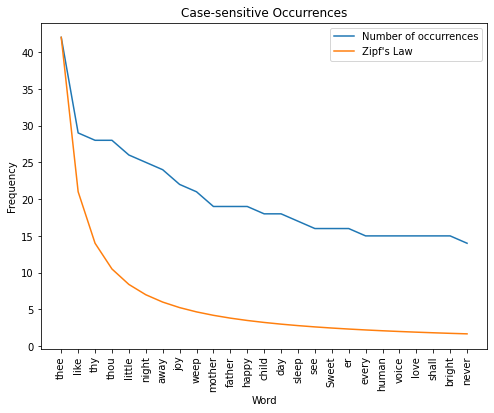

In [10]:
plot_occurrences(freqs_top, 'Case-sensitive Occurrences')

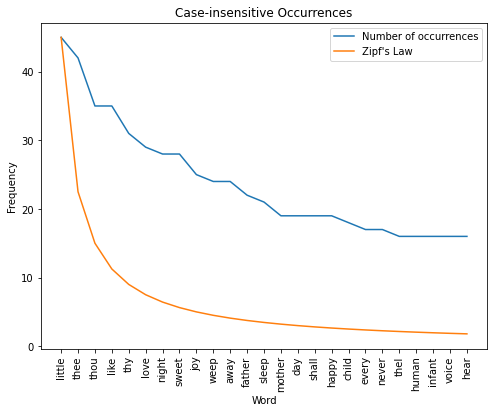

In [11]:
plot_occurrences(freqs_lower_top, 'Case-insensitive Occurrences')

The first distribution fits Zipf's law a bit better, but what would happen if stopwords are counted too?

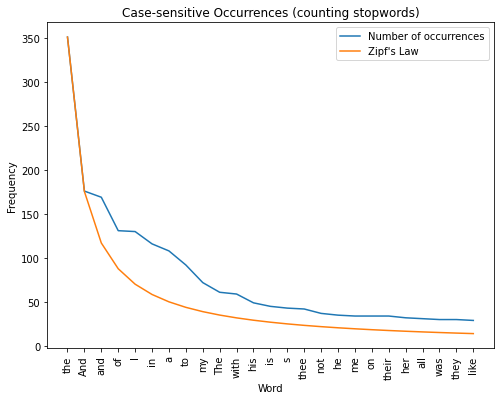

In [12]:
freqs_nsw = get_freqs(txt, filter_stopwords=False)
freqs_top_nsw = [(word, freqs_nsw[word]) 
                 for word in sorted(freqs_nsw, key=lambda k: freqs_nsw[k], reverse=True)[:25]]

plot_occurrences(freqs_top_nsw, 'Case-sensitive Occurrences (counting stopwords)')

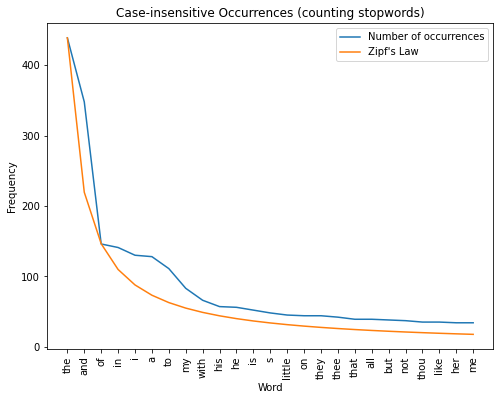

In [13]:
freqs_lower_nsw = get_freqs(txt, lower=True, filter_stopwords=False)
freqs_lower_top_nsw = [(word, freqs_lower_nsw[word]) 
                       for word in sorted(freqs_lower_nsw, key=lambda k: freqs_lower_nsw[k], reverse=True)[:25]]

plot_occurrences(freqs_lower_top_nsw, 'Case-insensitive Occurrences (counting stopwords)')

In this case, case-insensitive counting fits Zipf's Law better than the alternatives that filtered stopwords as in these plots every word is being taken into account.